In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Machine Learning

El machine learning, conocido en español como aprendizaje automático o aprendizaje de máquina, nació como una idea ambiciosa de la IA en la década de los 60. Para ser más exactos, fue una subdisciplina de la IA, producto de las ciencias de la computación y las neurociencias.

Lo que esta rama pretendía estudiar era el reconocimiento de patrones (en los procesos de ingeniería, matemáticas, computación, etc.) y el aprendizaje por parte de las computadoras. En los albores de la IA, los investigadores estaban ávidos por encontrar una forma en la cual las computadoras pudieran aprender únicamente basándose en datos.

<div>
<img src="ML.jpg", width="350"/>
</div>

Sucedió con el paso de los años que el machine learning comenzó a enfocarse en diferentes asuntos, tales como el razonamiento probabilístico, investigación basada en la estadística, recuperación de información, y continuó profundizando cada vez más en el reconocimiento de patrones (todos estos asuntos aplicados a procesos de ingeniería, matemáticas, computación y otros campos relacionados con objetos físicos o abstractos).

Esto ocasionó que en los 90 se separara de la IA para convertirse en una disciplina por sí sola, aunque muchos puristas aún la consideran como parte de la IA. Ahora, el principal objetivo del machine learning es abordar y resolver problemas prácticos en donde se aplique cualquiera de las disciplinas numéricas antes mencionadas. (Adext AI, 2021)

### Machine Learning en Pyton

La libreria tradicional para hacer ML en Python se llama Scikit-Learn, la cual tiene implementaciones de los modelos clásicos para atacar problemas de regresión, clasificación, clustering, preprocesamiento, selección de modelos y reducción de dimensionalidad. Como veremos más adelante, es una librería muy versatil, eficiente y sencilla de implementar

<div>
<img src="Scikit.png" width="950"/>
</div>

## Modelos de Aprendizaje

Cuando hablamos de ML existen dos tipos de problemas a los cuales nos podemos estar enfrentando:
* **Aprendizaje Supervisado**: Es el tipo de problemas donde tenemos una variable que queremos predecir ($Y$) y un grupo de variable para predecirla ($X$). 
* **Aprendizaje No Supervisado**: Es el tipo de problemas donde no tenemos una variable para predecir, unicamente tenemos el conjunto de variables $X$ y buscamos determinar si existe algun tipo de patron o asociacion entre ellas.

<div>
<img src="Sup.jpg" width="850"/>
</div>

## El Dataset

Antes de entrar a los modelos revisemos el dataset con el que vamos a trabajar. Los datos hacen referencia a clietes de un banco en Europa. Dentro del dataset hay clientes que han abandonado el banco y aquellos que no, nuestra mision es encontrar los determinantes que hacen que un cliente abandone el banco.

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


El número de clientes que no abandonaron el banco fue: 7963
El número de clientes que si abandonaron el banco fue: 2037


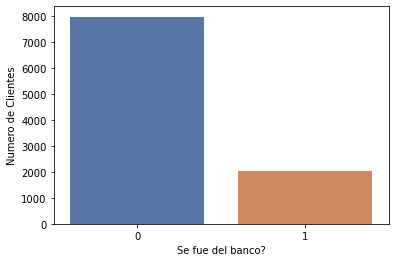

In [3]:
x_no = df[df['Exited']==0].shape[0]
x_si = df[df['Exited']==1].shape[0]
print('El número de clientes que no abandonaron el banco fue:',x_no)
print('El número de clientes que si abandonaron el banco fue:',x_si)
sns.set_palette("deep")
sns.countplot(x = 'Exited', data = df)
plt.ylabel('Numero de Clientes')
plt.xlabel('Se fue del banco?');

In [4]:
X = df.drop(['RowNumber', 'CustomerId', 'Surname','Exited'], axis = 1)
X = pd.merge(X, pd.get_dummies(X['Geography'], drop_first = True), left_index = True, right_index = True)
X = pd.merge(X, pd.get_dummies(X['Gender'], drop_first = True), left_index = True, right_index = True)
X.drop(['Geography', 'Gender'], axis = 1, inplace = True)
Y = df.Exited

## Aprendizaje Supervisado

Existen varios modelos para atacar problemas de aprendizaje supervisado. En este taller veremos muy por encima los mas utlizados:
* Regresión
* Arboles
* Random Forest
* Support Vector Machine

### Regresión Lineal y Lógistica

<tr>
<td> <img src="RL.PNG" alt="Drawing" style="width: 450px;"/> </td>
<td> <img src="LR.PNG" alt="Drawing" style="width: 450px;"/> </td>
</tr>

Los modelos de regresión buscan modelar la relación que existe entre una variable independiente $Y$ y unas variables explicativas $X$ de manera lineal, de la forma:

$$ Y = \beta_0+\beta_1X_1+\cdots+\beta_kX_k + \epsilon$$

Si la variable $Y$ es continua, tratamos con una **regresión tradicional**, mientras que si es binaria tratamos con una **regresión logística**.

Documentacion en Scikit: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression">Logistic Regression</a>

En python:

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, Y)
y_pred = clf.predict(X)
y_pred_proba = clf.predict_proba(X)[:,1]

In [6]:
from sklearn.metrics import accuracy_score
print('La precisión del modelo es:', '{:.2f}'.format(accuracy_score(Y, y_pred)))

La precisión del modelo es: 0.79


### Árboles de Clasificación

* El enfoque classification and regression tree (CART) fue desarrollado por Breiman et al. (1984).
* Principalmente usados en problemas de clasificación (Pero tambien pueden utilizarse para regresión)
* Las variables de entrada y salida pueden ser categóricas o continuas.
* Divide el espacio de predictores (variables independientes) en regiones distintas y no sobrepuestas.

<div>
<img src="CART.PNG" width="750"/>
</div>

Documentacion en Scikit: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier">Decision Tree Classifiers</a>

En python:

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, Y)
y_pred = clf.predict(X)
y_pred_proba = clf.predict_proba(X)[:,1]

In [8]:
from sklearn.metrics import roc_auc_score, accuracy_score, fbeta_score, r2_score, mean_squared_error
print('La precisión del modelo es:', '{:.2f}'.format(accuracy_score(Y, y_pred)))

La precisión del modelo es: 1.00


### Random Forest

* Random Forest se considera como la “panacea” en todos los problemas de ciencia de datos.
* Util para regresión y clasificación.
* Consiste en un grupo de modelos “débiles”, se combinan en un modelo robusto.
* Se generan múltiples árboles (a diferencia de CART). Cada árbol da una classificación (vota por una clase) y el resultado es la clase con mayor número de votos en todo el bosque (forest).
* Para regresión, se toma el promedio de las salidas (predicciones) de todos los árboles.

<div>
<img src="RF.png" width="750"/>
</div>

Documentacion en Scikit: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier">Random Forest Classifiers</a>

En python:

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, Y)
y_pred = clf.predict(X)
y_pred_proba = clf.predict_proba(X)[:,1]

In [10]:
print('La precisión del modelo es:', '{:.2f}'.format(accuracy_score(Y, y_pred)))

La precisión del modelo es: 1.00


### Support Vector Machine

El objectivo es encontrar un hiperplano en un espacio N dimensional (N — el número de entidades) que clasifica claramente los puntos de datos. Para separar las dos clases de puntos de datos, hay muchos hiperplanos posibles que podrían ser elegidos. Nuestro objetivo es encontrar un plano que tenga el margen máximo, es decir, la distancia máxima entre los puntos de datos de ambas clases. Maximizar la distancia de margen proporciona cierto refuerzo para que los puntos de datos futuros se puedan clasificar con más confianza.

<div>
<img src="SVM.png" width="750"/>
</div>

Documentacion en Scikit: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC">Support Vector Classifiers</a>

En python:

In [11]:
from sklearn.svm import SVC
clf = SVC(probability = True)
clf.fit(X, Y)
y_pred = clf.predict(X)
y_pred_proba = clf.predict_proba(X)[:,1]

In [12]:
print('La precisión del modelo es:', '{:.2f}'.format(accuracy_score(Y, y_pred)))

La precisión del modelo es: 0.80


## Overfitting y Underfitting

El entrenar un modelo con todos los datos que tenemos a nuestra dispocición nos puede jugar una mala pasada. 

Ya que la finalidad del modelo que contruyamos es ser usado con nuevos datos, del mundo real, normalmente dividimos nuestra base en dos subconjuntos: datos de entrenamiento y datos de prueba (y a veces a tres: entrenar, validar y probar), y ajustar nuestro modelo en los datos del train, con el fin de hacer predicciones sobre los datos de prueba. Cuando hacemos eso, una de dos cosas puede suceder: "overfitting" (sobreajuste) o "underfitting" (subajuste).

<div>
<img src="ofuf.png" width="750"/>
</div>

El **Overfitting** ocurre cuando nuestro modelo se ajusta demasiado bien a los datos. En otras palabras en ves de aprender de los datos, los memorizo. Esto hace que sobre los datos que entrenamos tengamos errores muy bajos y precisiones muy altas, pero con cualquier dato nuevo (no visto durante el entrenamiento) el modelo no sabra que hacer.  

Esto suele ocurrir cuando el modelo es demasiado complejo (es decir, demasiadas características/variables en comparación con el número de observaciones). Este modelo será muy preciso en los datos de entrenamiento, pero probablemente no será muy preciso en datos no entrenados o nuevos. Esto se debe a que este modelo no está generalizado (o no como generalizado), lo que significa que puede generalizar los resultados y no puede hacer ninguna inferencia sobre otros datos, que es, en última instancia, lo que está intentando hacer. 

Por otra parte el **Underfitting** ocurre cuando el modelo no se ajusta bien ni siquiera a los datos de entrenamiento y por esto deja de lado las tendencias presentes en los datos. También significa que el modelo no se puede generalizar a nuevos datos. 

De manera contraria al **Overfitting**, esto suele ser el resultado de un modelo muy simple (no hay suficientes predictores / variables independientes) (Towards Data Science, 2021)

## Train - Test Split

Con el fin de minimizar los problemas mencionados anteriormente, la base de datos se separa en normalmente en dos: Datos de trin, con los que se entrena el modelo y los dato de Test con los que se prueba o mide el modelo construido. Normalmente se hace una separación de 80 - 20 o 70 - 30, siendo el primer número el porcentaje de los datos que se usa para entrenar y el segundo número el porcentaje de los datos que se usa para probar.

<div>
<img src="train-test.png" width="750"/>
</div>

## Validación Cruzada

Junto con la separación de datos, podemos hacer uso de la validación cruzada para garantizar o maximizar el potencial de generalización que tendra nuestro modelo y de la misma manera, su utilidad. La validación cruzada es muy similar a la división de train/test, pero se aplica a más subconjuntos.

<div>
<img src="kfcv.png" width="750"/>
</div>

La idea la este tipo de validación es tomar el conjunto de datos de entrenamiento y separarlo en k grupos del mismo tamaño. Utilizamos k-1 grupos para entrenar el modelo y utilizamos el ultimo para test. Repetimos el procedimiento de manera que todos los subcojuntos sean utilizados una vez como test. De esta manera todos los conjuntos son usado al menos una vez como parte del entrenamiento y como parte del test, lo que previene que el modelo se memorice los datos, pues estos siempren van cambiando y para ser considerado bueno debe tener buen desempeño sobre todos los subconjuntos. Para finalizar, promediamos los resultados de cada iteración y esta sera una medida de la generalización del modelo. 

Al tener nuestro modelo entrenado por validación cruzada procedemos a probarlo contra los datos que nunca ha visto, el conjunto original de test.

La validación cruzada será tambien nuestra herramienta para seleccionar el mejor conjunto de parámetros para nuestro modelo.

## Calibración de Hiperparámetros

Cada uno de los algoritmos de aprendizaje depende de una serie de hiperparámetros que determinan la menra en como se coporta y responde el algoritmo. Seleccionando el conjunto "optimo"de parámetros para nuestro caso particular, podemosmaximizar el desempeño del algoritmo utilizado. Es importante tener en cuenta que cada algoritmo posee una serie diferente de parametros con los que ponemos jugar.

<div>
<img src="tuning.png" width="550"/>
</div>

La calibración de los hiperparámetros podemos hacerla mediante *GridSearch* o *RandomSearch*

## Medidas de calidad del Modelo

Nuestro fin es construir el mejor modelo para la situación específica en la que trabajamos pero, como sabemos si un modelo es el "mejor"? aun mas, como sabemos si un modelo es bueno. Para los modelos que construimos anteriormente calculamos la precisión de las predicciones, pero existen muchas mas medidas que pueden ser mejores y nos pueden dar mas información.

Para modelos de clasificación binarios, la base de todas estas medidas de calidad se halla en la **matriz de confusión**: 
* Una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

<div>
<img src="conf.jpg" width="700"/>
</div>

Las métricas mas comunes de la matriz son:
* **La precisión**: Mide el porcentaje de aciertos del modelo.
* **La sensibilidad**: Mide la capacidad del modelo de predecir la clase "Positiva" (los 1's).
* **La especificidad**: Mide la capacidad del modelo de predecir la clase "Negativa" (los 0's).

Otra medida muy popular, que puede considerrse mejor que las anteriores es el area bajo la curva ROC **(AUC)**:

* "La curva Característica del operador receptor (ROC) es una métrica de evaluación para problemas de clasificación binaria. Es una curva de probabilidad que traza el TPR contra el FPR en varios valores de umbral y esencialmente separa la «señal» del «ruido».El Área bajo la curva (AUC) es la medida de la capacidad de un clasificador para distinguir entre clases y se utiliza como resumen de la curva ROC." (Analytics Vidhya, 2020)

* Cuando el área bajo la curva es igual a 1, el clasificador es capaz de distinguir perfectamente entre todos los puntos de Positivos y Negativos correctamente. Sin embargo, si el AUC hubiera sido 0, entonces el clasificador estaría prediciendo todos los negativos como positivos, y todos los positivos como negativos.

* Cuando 0.5 < AUC < 1, existe una alta probabilidad de que el clasificador pueda distinguir los valores de clase positivos de los valores de clase negativos. Esto es así porque el clasificador es capaz de detectar más números de verdaderos positivos y verdaderos negativos que falsos negativos y falsos positivos.

* Cuando AUC = 0.5, el clasificador no puede distinguir entre puntos de clase positivos y negativos. Lo que significa que el clasificador predice clase aleatoria o clase constante para todos los puntos de datos.

* Por lo tanto, cuanto mayor sea el valor AUC para un clasificador, mejor será su capacidad para distinguir entre clases positivas y negativas.









<div>
<img src="roc.png" width="400"/>
</div>

Mas información de la curva ROC: <a href="https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/">AUC</a>

Ahora que ya conocemos mas acerca del proceso, apliquemos todo esto a los modelos anteriores:

## Modelado (Como debe ser!)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Tomemos la regresion logistica como ejemplo

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
Pipeline_LR = Pipeline(steps = [("Logit",LogisticRegression())])

Param_LR = {
'Logit__penalty': ['l1', 'l2', 'elasticnet' 'none'],
'Logit__C': np.logspace(-10,10,10) 
}

Grid_LR = GridSearchCV(estimator = Pipeline_LR, param_grid = Param_LR, scoring='roc_auc', cv = 5)
Grid_LR.fit(x_train,y_train)

print('Mejores Parametros: %s' % Grid_LR.best_params_)
print('Mejor AUC en Train: %.3f' % Grid_LR.best_score_)

Mejores Parametros: {'Logit__C': 12.915496650148826, 'Logit__penalty': 'l2'}
Mejor AUC en Train: 0.652


In [15]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
y_pred = Grid_LR.best_estimator_.predict(x_test)
y_pred_proba = Grid_LR.best_estimator_.predict_proba(x_test)[:,1]
print('La precisión del modelo calibrado es:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('El AUC del modelo calibrado es:', '{:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

La precisión del modelo calibrado es: 0.80
El AUC del modelo calibrado es: 0.67


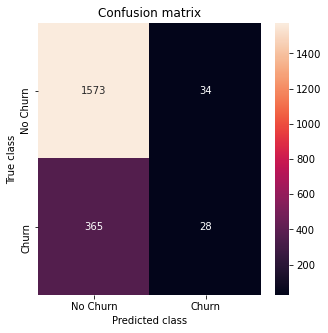

In [16]:
y_pred = Grid_LR.best_estimator_.predict(x_test)
LABELS = ["No Churn", "Churn"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Podemos ver información mas detallada con el comando *classification_report*

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



Finalmente podemos ver el efecto o relevancia de cada variable en la clasificación final. Para el caso de la Regresión Logística, esto lo encontramos en los coeficientes de las variables.

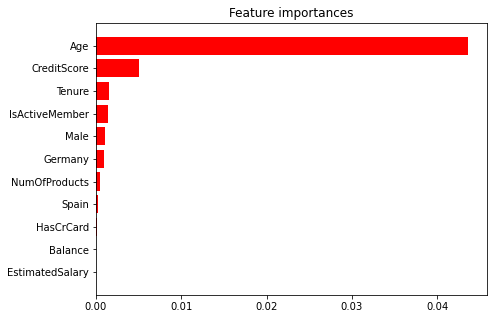

In [18]:
importances = abs(Grid_LR.best_estimator_.named_steps['Logit'].coef_[0])
indices = np.argsort(importances)
plt.rcParams["figure.figsize"] = (7, 5)
plt.figure()
plt.title("Feature importances")
plt.barh(range(x_train.shape[1]), importances[indices], color="r", align="center")
plt.yticks(range(x_train.shape[1]), x_train.columns[indices])
plt.ylim([-1, x_train.shape[1]])
plt.show()

Ciertamente podemos repetir todo este procedimiento para cada uno de nuestros modelos, uno a uno, pero mejor hagamos uso de python para consensar nuestros analisis y resultados en un solo lugar, de manera que nuestro código se vea organizado y optimizado y de la misma manera nos sea muy facil comparar modelos y tomar una decisión

## Putting it all together

Primero hagamos la separación entre train y test.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Ahora, generemos un pipeline y una grilla para cada uno de los modelo que queremos analizar.

In [20]:
# 1. Regresión Logistica.
Pipeline_LR = Pipeline(steps = [("Logit", LogisticRegression())])

Param_LR = {
'Logit__penalty': ['l1', 'l2', 'elasticnet' 'none'],
'Logit__C': np.logspace(-10,10,10) 
}

Grid_LR = GridSearchCV(estimator = Pipeline_LR, param_grid = Param_LR, scoring='roc_auc', cv = 5, n_jobs = -1)

# 2. Arbol de CLasificación
Pipeline_AD = Pipeline(steps = [("CART", DecisionTreeClassifier())])

Param_AD = {
    'CART__max_depth': np.linspace(1, 20, 20, endpoint=True),
    'CART__max_features': list(range(1,x_train.shape[1])),
    'CART__min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
    'CART__min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)  
}

Grid_AD = GridSearchCV(estimator = Pipeline_AD, param_grid = Param_AD, scoring='roc_auc', cv = 5, n_jobs = -1)

# 3. Random Forest
Pipeline_RF = Pipeline(steps = [("RF", RandomForestClassifier())])

Param_RF = {
    'RF__max_depth': np.linspace(1, 20, 20, endpoint=True),
    'RF__max_features': list(range(1,x_train.shape[1])),
    'RF__min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),
    'RF__min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)  
}

#Grid_RF = GridSearchCV(estimator = Pipeline_RF, param_grid = Param_RF, scoring='roc_auc', cv = 5, n_jobs = -1)
Grid_RF = RandomizedSearchCV(estimator = Pipeline_RF, param_distributions = Param_RF, scoring = 'roc_auc', cv = 5, n_iter = 500, n_jobs = -1)

# 4. Suport Vector Machine
Pipeline_SVM = Pipeline(steps = [("SVM", SVC(kernel = 'linear', probability = True))])

Param_SVM = {
    'SVM__C': np.logspace(-10, 5, 10)
}

#Grid_SVM = GridSearchCV(estimator = Pipeline_SVM, param_grid = Param_SVM, scoring='roc_auc', cv = 5, n_jobs = -1)
Grid_SVM = RandomizedSearchCV(estimator = Pipeline_SVM, param_distributions = Param_SVM, scoring = 'roc_auc', cv = 5, n_iter = 10, n_jobs = -1)


Ahora construyamos una lista y diccionario de las grillas, para que sea mas facil su recorrido.

In [21]:
grids = [Grid_LR, Grid_AD, Grid_RF]
grid_dict = {0: 'Regresión Logística', 1: 'Árbol de Clasificación', 2: 'Random Forest', 3: 'Support Vector Machine'}

Listo, ahora podemos construir un recorrido para correr nuestros modelos uno despues de otro y compararlos.

In [22]:
print('Iniciando Calibración de Modelos')
best_auc = 0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nModelo: %s' % grid_dict[idx])
    # Ajustamos la grilla
    gs.fit(x_train, y_train)
    # Mejores Parámetros
    print('Mejores Parametros: %s' % gs.best_params_)
    # Mejor auc en train
    print('Mejor AUC en Training: %.3f' % gs.best_score_)
    # Predecimos en test con el mejor modelo
    y_pred_proba = gs.best_estimator_.predict_proba(x_test)[:,1]
    # AUC en test con el mejor modelos
    print('AUC en Test con el mejor modelo: %.3f ' % roc_auc_score(y_test, y_pred_proba))
    # Guardamos el mejor modelo (aquel con el  mayor AUC en test)
    if roc_auc_score(y_test, y_pred_proba) > best_auc:
        best_auc = roc_auc_score(y_test, y_pred_proba)
        best_gs = gs
        best_clf = idx
print('\nModelo con el mejor AUC en Test %s' % grid_dict[best_clf])

Iniciando Calibración de Modelos

Modelo: Regresión Logística
Mejores Parametros: {'Logit__C': 12.915496650148826, 'Logit__penalty': 'l2'}
Mejor AUC en Training: 0.652
AUC en Test con el mejor modelo: 0.669 

Modelo: Árbol de Clasificación
Mejores Parametros: {'CART__max_depth': 14.0, 'CART__max_features': 9, 'CART__min_samples_leaf': 0.1, 'CART__min_samples_split': 0.1}
Mejor AUC en Training: 0.762
AUC en Test con el mejor modelo: 0.775 

Modelo: Random Forest
Mejores Parametros: {'RF__min_samples_split': 0.1, 'RF__min_samples_leaf': 0.1, 'RF__max_features': 2, 'RF__max_depth': 20.0}
Mejor AUC en Training: 0.792
AUC en Test con el mejor modelo: 0.803 

Modelo con el mejor AUC en Test Random Forest


## Bibliografía